### 1. Working with Time Series in Pandas

In [16]:
import pandas as pd
from datetime import datetime # To manually create dates
import matplotlib.pyplot as plt

#### 1.1. How to use data and times with pandas


The timestamp object has many attributes that can be used to retrieve specific time information of your data such as year, and weekday. In the example below the year of the data is retrieved.


In [2]:
time_stamp = pd.Timestamp(datetime(2017, 1, 1))
time_stamp

Timestamp('2017-01-01 00:00:00')

In [6]:
time_stamp.year, time_stamp.month, time_stamp.month_name, time_stamp.day_of_week, time_stamp.dayofweek, time_stamp.weekday

(2017,
 1,
 <function Timestamp.month_name>,
 6,
 6,
 <bound method Timestamp.weekday of Timestamp('2017-01-01 00:00:00')>)

The second building block is the period object. The period object has a freq attribute to store the frequency information. The default is monthly freq and you can convert from freq to another as shown in the example below.

In [7]:
period = pd.Period('2017-01')
period

Period('2017-01', 'M')

In [8]:
period.asfreq('D') # convert to daily

Period('2017-01-31', 'D')

In [9]:
# You can also convert period to timestamp and vice versa. This is shown in the example below.
period.to_timestamp().to_period('M')

Period('2017-01', 'M')

You can do basic data arithmetic operations, for example starting with a period object for January 2017 at a monthly frequency, just add the number 2 to get a monthly period for March 2017. This is shown in the example below.

In [10]:
period = pd.Period('2017-01')
period+2

Period('2017-03', 'M')

To create a sequence of Timestamps, use the pandas' function date_range. You need to specify a start date, and/or end date, or a number of periods. The default is daily frequency. The function returns the sequence of dates as a DateTimeindex with frequency information

In [11]:
index = pd.date_range(start='2023-01-01', periods=12, freq='M')
index

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='M')

#### 1.2. Indexing & resampling time series

The basic transformations include parsing dates provided as strings and converting the result into the matching Pandas data type called datetime64. They also include selecting subperiods of your time series, and setting or changing the frequency of the DateTimeIndex.

Upsampling involves increasing the time frequency, which requires generating new data. Downsampling means decreasing the time-frequency, which requires aggregating data


In [43]:
google = pd.read_csv('data/google.csv')
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


The date information is converted from a string (object) into a datetime64 and also we will set the Date column as an index for the data frame as it makes it easier that to deal with the data by using the following code

In [45]:
google.Date = pd.to_datetime(google.Date)
google.set_index('Date', inplace=True)
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


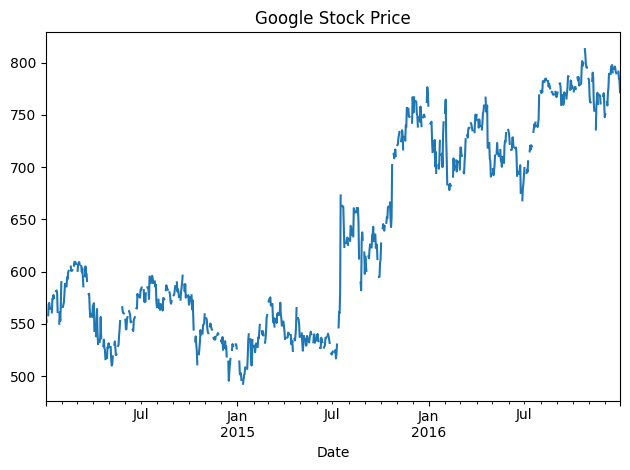

In [46]:
# To have a better intuition of what the data looks like, let's plot the prices with time using the code below:
google.Close.plot(title='Google Stock Price')
plt.tight_layout();
plt.show()


In [52]:
# You can also partial indexing the data using the date index as the following example:
google.loc['2015'].info()
# Pass String for path of date

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [54]:
google.loc['2015-3':'2016-2'].info() # slice includes last month

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2015-03-01 to 2016-02-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


You may have noticed that our DateTimeIndex did not have frequency information. You can set the frequency information using dot-asfreq.
The alias ‘D’ stands for calendar day frequency. 

As a result, the DateTimeIndex now contains many dates where the stock wasn’t bought or sold.

In [55]:
google.asfreq('D').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


The number of instances has increased to 756 due to this daily sampling. The code below prints the first five rows of the daily resampled data:

In [56]:
google.asfreq('D').head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


We can also set the DateTimeIndex to business day frequency using the same method but changing ‘D’ into ‘B’ in the .asfreq() method. This is shown in the example below:

In [57]:
google = google.asfreq('B') # Change to calendar day frequency
google.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2014-01-02 to 2016-12-30
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


#### 1.3. Lags, changes, and returns for stock price series

Shift or lag values back or forward back in time. shift(): Moving data between past & future. The default is one period into the future, but you can change it, by giving the periods variable the desired shift value.

In [58]:
google['shifted'] = google.Close.shift() # default: periods = 1 
google.head()

,Close,shifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-06,558.10,551.95
2014-01-07,568.86,558.10
2014-01-08,570.04,568.86


In [61]:
# To move the data into the past you can use periods=-1 as shown in the figure below:
google['lagged'] = google.Close.shift(periods=-1) 
google.head()

,Close,shifted,lagged
Date,,,
2014-01-02,556.00,NaN,551.95
2014-01-03,551.95,556.00,558.10
2014-01-06,558.10,551.95,568.86
2014-01-07,568.86,558.10,570.04
2014-01-08,570.04,568.86,564.55


One of the important properties of the stock prices data and in general in the time series data is the percentage change. It’s formula is : ((X(t)/X(t-1))-1)*100.

There are two ways to calculate it, we can use the built-in function df.pct_change() or use the functions df.div.sub().mul() and both will give the same results as shown in the example below:


In [62]:
google['change'] = google.Close.div(google.shifted)
google['return'] = google.change.sub(1).mul(100)
google.head(3)

,Close,shifted,lagged,change,return
Date,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN
2014-01-03,551.95,556.00,558.10,0.992716,-0.728417
2014-01-06,558.10,551.95,568.86,1.011142,1.114231


In [63]:
google['pct_change'] = google.Close.pct_change().mul(100)
google.head(3)

,Close,shifted,lagged,change,return,pct_change
Date,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN
2014-01-03,551.95,556.00,558.10,0.992716,-0.728417,-0.728417
2014-01-06,558.10,551.95,568.86,1.011142,1.114231,1.114231


In [65]:
# We can also get multiperiod returns using the periods variable in the df.pct_change() method as shown in the following example.
google['return_3d'] = google.Close.pct_change(periods=3).mul(100)
google.head(5)

,Close,shifted,lagged,change,return,pct_change,return_3d
Date,,,,,,,
2014-01-02,556.00,NaN,551.95,NaN,NaN,NaN,NaN
2014-01-03,551.95,556.00,558.10,0.992716,-0.728417,-0.728417,NaN
2014-01-06,558.10,551.95,568.86,1.011142,1.114231,1.114231,NaN
2014-01-07,568.86,558.10,570.04,1.019280,1.927970,1.927970,2.312950
2014-01-08,570.04,568.86,564.55,1.002074,0.207432,0.207432,3.277471


### 2. Basic Time Series Metrics & Resampling


#### 2.1. Resampling

  - When you upsample by converting the data to a higher frequency, you create new rows and need to tell pandas how to fill or interpolate the missing values in these rows. 
  
  - When you downsample, you reduce the number of rows and need to tell pandas how to aggregate existing data.

In [66]:
# Creating a Quaterly data

dates = pd.date_range(start='2016', periods=4, freq='Q')
data = range(1,5)
quaterly = pd.Series(data=data, index=dates)
quaterly


2016-03-31    1
2016-06-30    2
2016-09-30    3
2016-12-31    4
Freq: Q-DEC, dtype: int64

In [67]:
monthly = quaterly.asfreq('M')
monthly = monthly.to_frame('baseline') # to dataframe
monthly

,baseline
2016-03-31,1.0
2016-04-30,NaN
2016-05-31,NaN
2016-06-30,2.0
2016-07-31,NaN
2016-08-31,NaN
2016-09-30,3.0
2016-10-31,NaN
2016-11-30,NaN
2016-12-31,4.0


Let’s compare three ways that pandas offer to fill missing values when upsampling. The first two options involve choosing a fill method, either forward fill or backfill. The third option is to provide full value.

In [68]:
monthly['ffill'] = quaterly.asfreq('M', method='ffill')
monthly['bfill'] = quaterly.asfreq('M', method='backfill')
monthly['value'] = quaterly.asfreq('M', fill_value=0)
monthly

,baseline,ffill,bfill,value
2016-03-31,1.0,1,1,1
2016-04-30,NaN,1,2,0
2016-05-31,NaN,1,2,0
2016-06-30,2.0,2,2,2
2016-07-31,NaN,2,3,0
2016-08-31,NaN,2,3,0
2016-09-30,3.0,3,3,3
2016-10-31,NaN,3,4,0
2016-11-30,NaN,3,4,0
2016-12-31,4.0,4,4,4


If you want a monthly DateTimeIndex that covers the full year, you can use dot-reindex. Pandas align existing data with the new monthly values and produce missing values elsewhere. You can use the exact same fill options for dot-reindex as you just did for dot-asfreq.



In [69]:
dates = pd.date_range(start='2016', periods=12, freq='M')
quaterly.reindex(dates)

2016-01-31    NaN
2016-02-29    NaN
2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

#### 2.2. Upsampling & interpolation

The resample method follows a logic similar to dot-groupby: 

It groups data within a resampling period and applies a method to this group. It takes the value that results from this method and assigns a new date within the resampling period.

In [70]:
unrate = pd.read_csv('data/monthly unemployment rate.csv', parse_dates=['DATE'], index_col='DATE')
unrate.head()

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


In [72]:
unrate.info()
# No frequency information

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [73]:
# So let's resample it by the starting of each calendar month using both dot-resample and dot-asfreq methods.
unrate.asfreq('MS').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [74]:
unrate.resample('MS') # creates Resampler object
unrate.asfreq('MS').equals(unrate.resample('MS').asfreq())

True

Resampling implements the following logic: When up-sampling, there will be more resampling periods than data points. Each resampling period will have a given date offset, for instance, month-end frequency. 

You then need to decide how to create data for the new resampling periods. The new data points will be assigned to the date offsets. In contrast, 

when down-sampling, there are more data points than resampling periods. Hence, you need to decide how to aggregate your data to obtain a single value for each date offset.

